Mes que se ha gastado más: Abril
Mes que se ha ahorrado más: Enero
Media de gastos al año: -24732.58€
Gastos totales: -296791.0€
Ingresos totales: 280961.0€


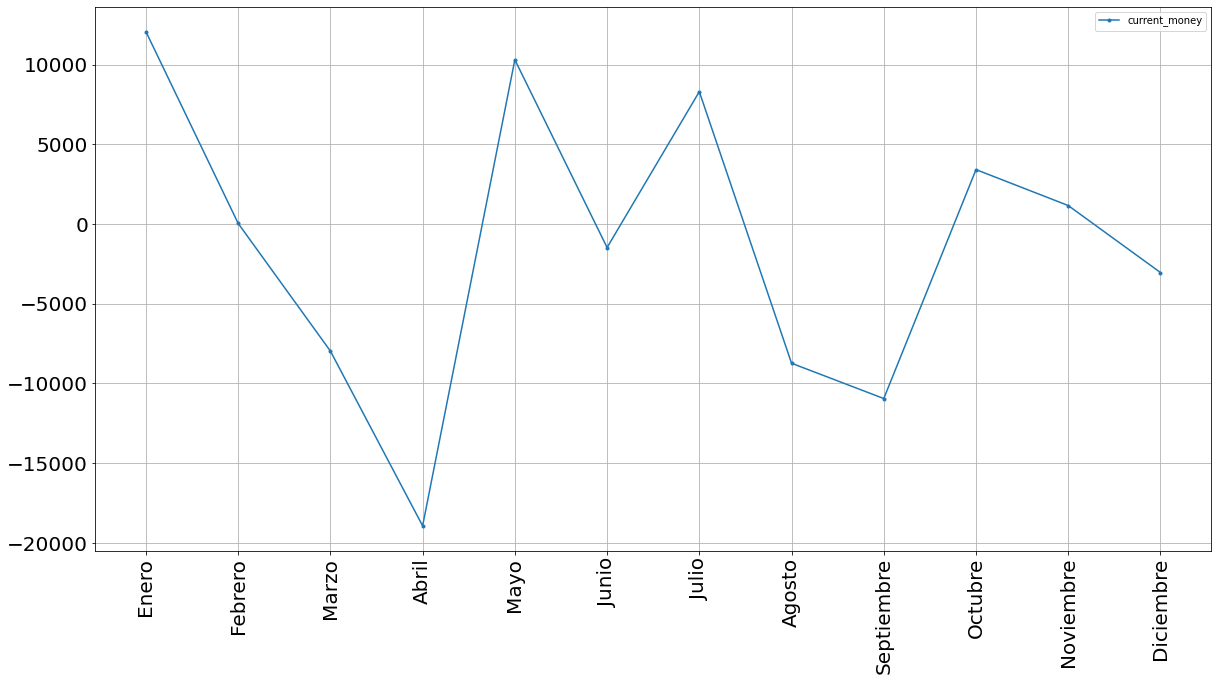

In [24]:
import pandas as pd
import statistics


def read_file():
    try:
        df = pd.read_csv('./finanzas2020.csv', sep='\t')
        df = df.dropna(how='all', axis=1)
        assert(len(df.columns) == 12)
        for month in df.columns:
            df[month] = pd.to_numeric(df[month], errors='coerce')
        return df
    except FileNotFoundError as ex:
        print(f'No se encontro el fichero o no se pudo leer \n{ex}')
        quit()
    except AssertionError:
        print(f'El documento no tiene 12 columnas')
        quit()


def monthly_expenses(df):
    result = []
    for month in df.columns:
        result.append(df[month].loc[df[month] < 0].sum())
    return result


def monthly_savings(df):
    result = []
    for month in df.columns:
        result.append(df[month].loc[df[month] > 0].sum())
    return result


def average_annual_expenses(df):
    pass


if __name__ == '__main__':
    df = read_file()
    expenses_per_month = [float(i) for i in monthly_expenses(df)]
    savings_per_month = monthly_savings(df)
    print(
        f'Mes que se ha gastado más: {df.columns[expenses_per_month.index(min(expenses_per_month))]}')
    print(
        f'Mes que se ha ahorrado más: {df.columns[savings_per_month.index(max(savings_per_month))]}')
    print(
        f'Media de gastos al año: {round(statistics.mean(expenses_per_month), 2)}€')
    print(f'Gastos totales: {sum(expenses_per_month)}€')
    print(f'Ingresos totales: {sum(savings_per_month)}€')

    current_money = [expenses_per_month[i]+savings_per_month[i]
                     for i in range(len(expenses_per_month))]

    data = {'current_money': current_money}
    new_df = pd.DataFrame(data, index=df.columns)

    ax = new_df.plot(fontsize=20, figsize=(20,10), style='.-', grid=True)
    ax.set_xticks(range(len(new_df)));
    ax.set_xticklabels(df.columns, rotation=90);
